# Plotting

In [1]:
import pandas as pd
import seaborn as sns; sns.set_style("whitegrid")

In [2]:
def prep_data():
    data.index.name = 'fold'
    data = data.reset_index()
    data['fold'] += 1

In [3]:
data = pd.read_json('all_results.json')
data.index.name = 'fold'
data = data.reset_index()
data['fold'] += 1

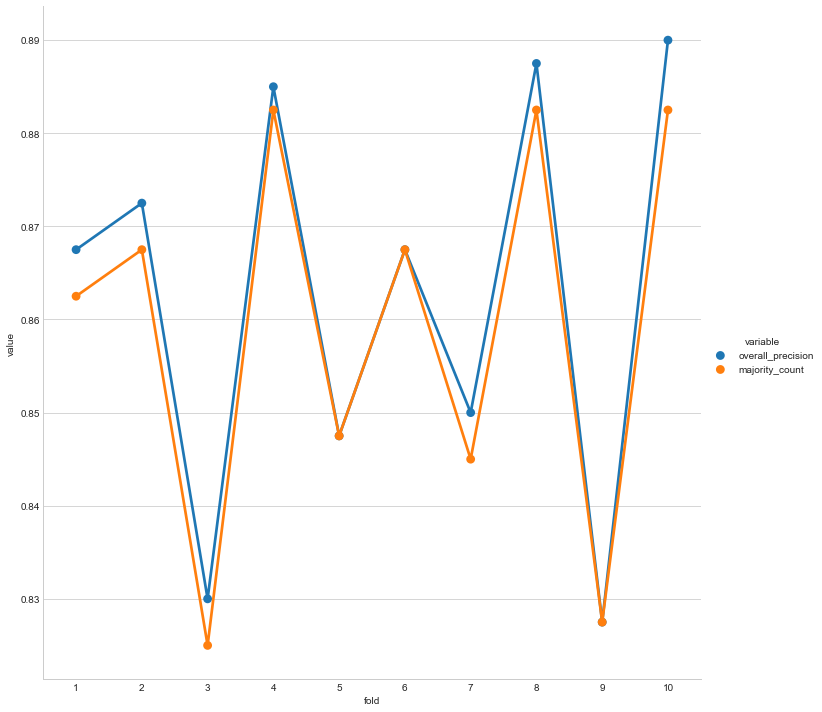

In [7]:
p = make_precision_plot(data)

In [8]:
p.savefig('images/dec_tree_prec.png')

In [5]:
def make_precision_plot(data, ylim=None):
    
    cols = ['overall_precision', 'majority_count']
    
    melted_data = data.melt(
        id_vars='fold',
        value_vars=cols)
    
    p = sns.factorplot(
        x="fold", y="value", hue='variable',
        data=melted_data, size=10,)
    if ylim:
        p.set(ylim=ylim)
        
    return p

In [13]:
def make_all_metrics_plot(data):
    
    cols = [
        'compliant_f1', 'compliant_precision', 'compliant_recall',
        'noncompliant_f1', 'noncompliant_precision', 'noncompliant_recall',
        'safe_f1', 'safe_precision', 'safe_recall']
    
    melted_df = data.melt(
        id_vars='fold',
        value_vars=cols)
    
    new = melted_df.variable.str.split('_', expand=True)
    new.columns = ['class', 'metric']
    df = pd.concat([melted_df, new], axis=1)
    
    p = sns.factorplot(
        x="fold", y="value",
        col='metric', hue='class',
        data=df, size=10)
    
    return p

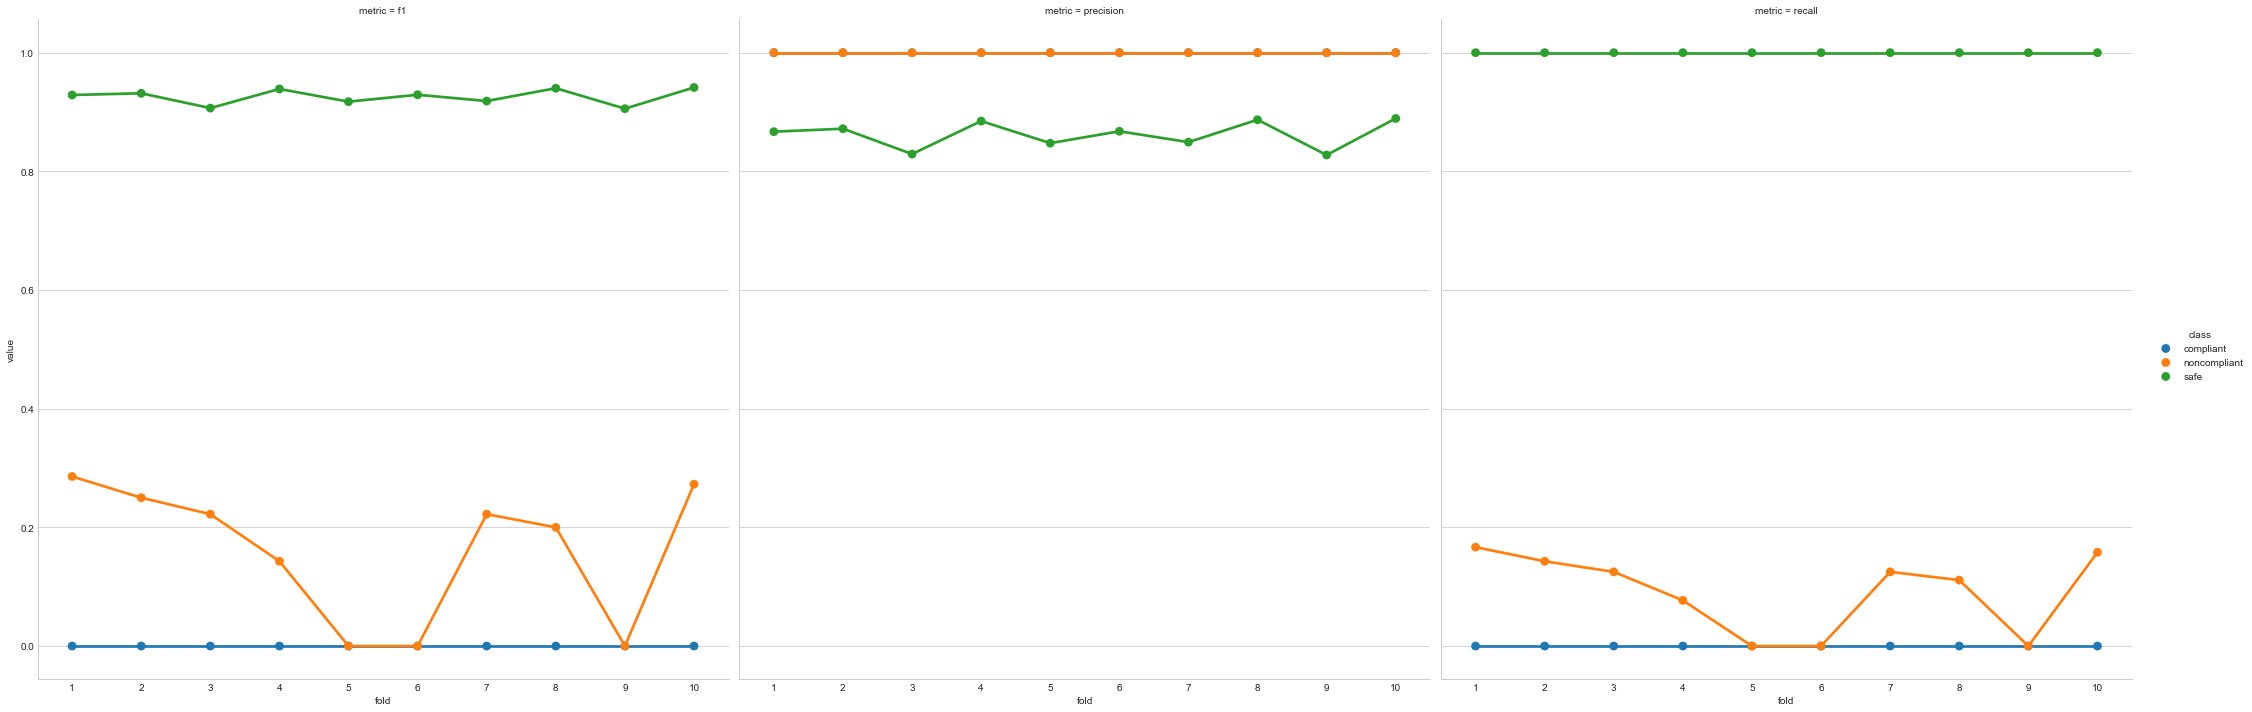

In [14]:
p = make_all_metrics_plot(data)

In [15]:
p.savefig('images/dec_tree_all_metrics.png')

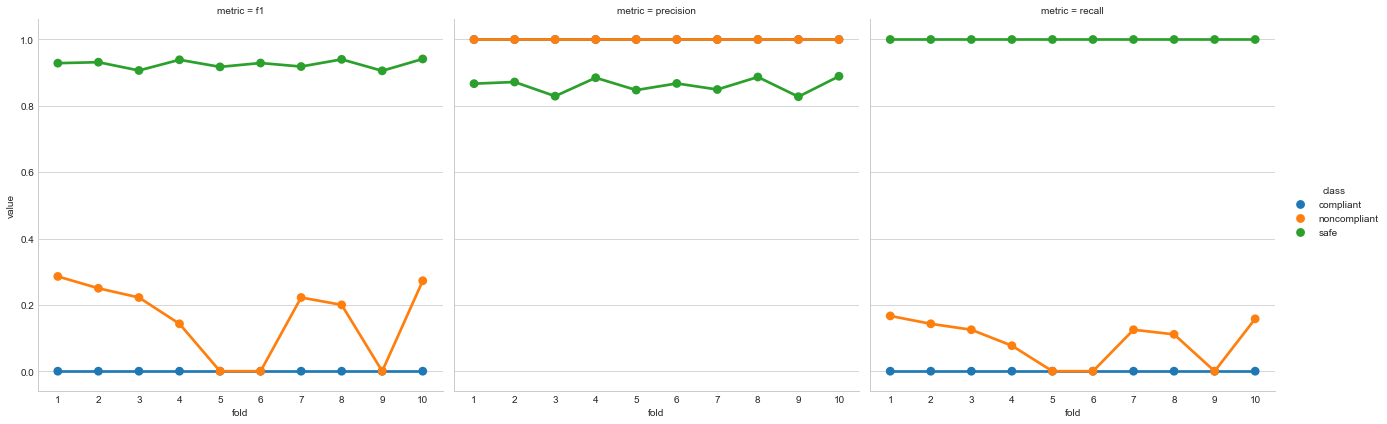

In [69]:
g = sns.factorplot(
    x="fold", y="value",
    col='metric', hue='class',
    data=df, size=6)
g.savefig('images/dec_tree_metrics.png')

In [55]:
def make_precision_plot(cols, ylim=None, split=False):
    
    melted_data = data.melt(
        id_vars='fold',
        value_vars=cols)
    
    if split:
        new = melted_df.variable.str.split('_', expand=True)
        new.columns = ['class', 'metric']
        df = pd.concat([melted_df, new], axis=1)
    
    g = sns.factorplot(
        x="fold", y="value", kind='point',
        hue='variable', data=melted_data, size=10,
        saturation=.5)
    if ylim:
        g.set(ylim=ylim)
        
    return g

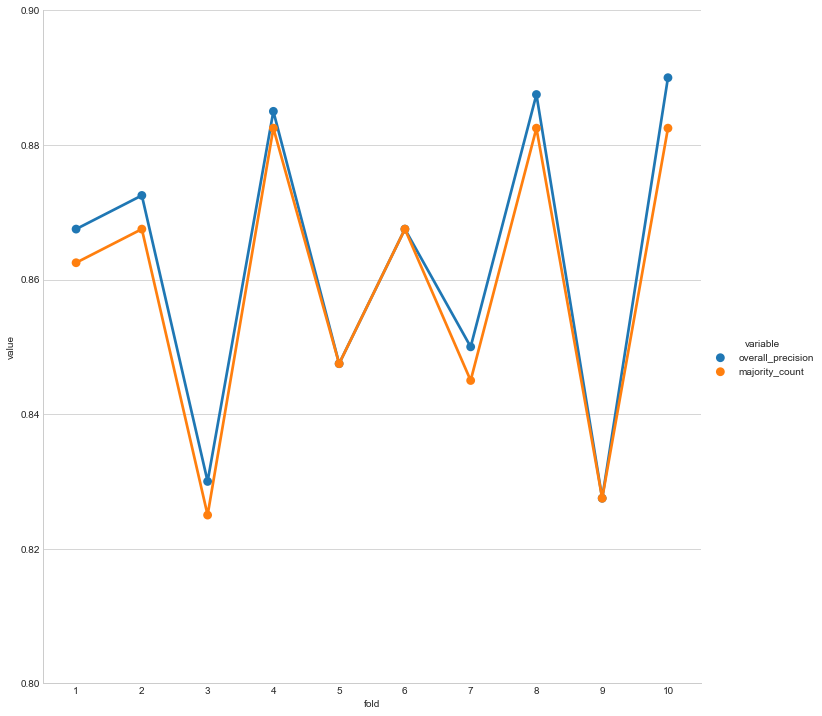

In [56]:
cols = ['overall_precision', 'majority_count']
p = make_plot(cols, ylim=(0.8,.9))
p.savefig('images/dec_tree_overall.png')

In [57]:
cols = [
    'compliant_f1', 'compliant_precision', 'compliant_recall',
    'noncompliant_f1', 'noncompliant_precision', 'noncompliant_recall',
    'safe_f1', 'safe_precision', 'safe_recall']

In [60]:
melted_df = data.melt(
        id_vars='fold',
        value_vars=cols)

In [66]:
melted_df.head()

,fold,variable,value
0,1,compliant_f1,0.0
1,2,compliant_f1,0.0
2,3,compliant_f1,0.0
3,4,compliant_f1,0.0
4,5,compliant_f1,0.0


In [63]:
new = melted_df.variable.str.split('_', expand=True)
new.columns = ['class', 'metric']
df = pd.concat([melted_df, new], axis=1)

In [64]:
df.head()

,fold,variable,value,class,metric
0,1,compliant_f1,0.0,compliant,f1
1,2,compliant_f1,0.0,compliant,f1
2,3,compliant_f1,0.0,compliant,f1
3,4,compliant_f1,0.0,compliant,f1
4,5,compliant_f1,0.0,compliant,f1


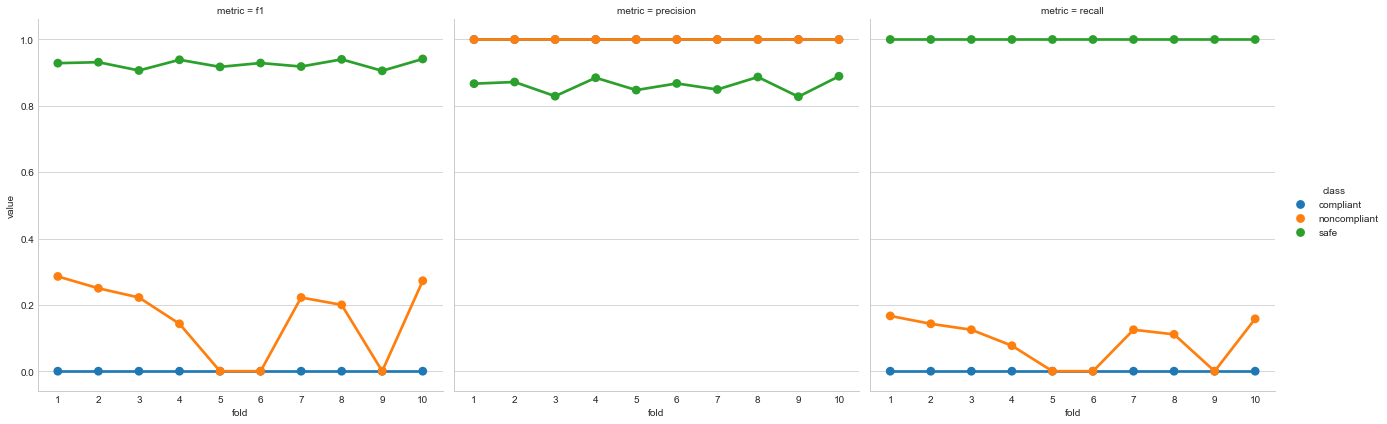

In [65]:
g = sns.factorplot(
    x="fold", y="value",
    col='metric', hue='class',
    data=df, size=6)
g.savefig('images/dec_tree_metrics.png')

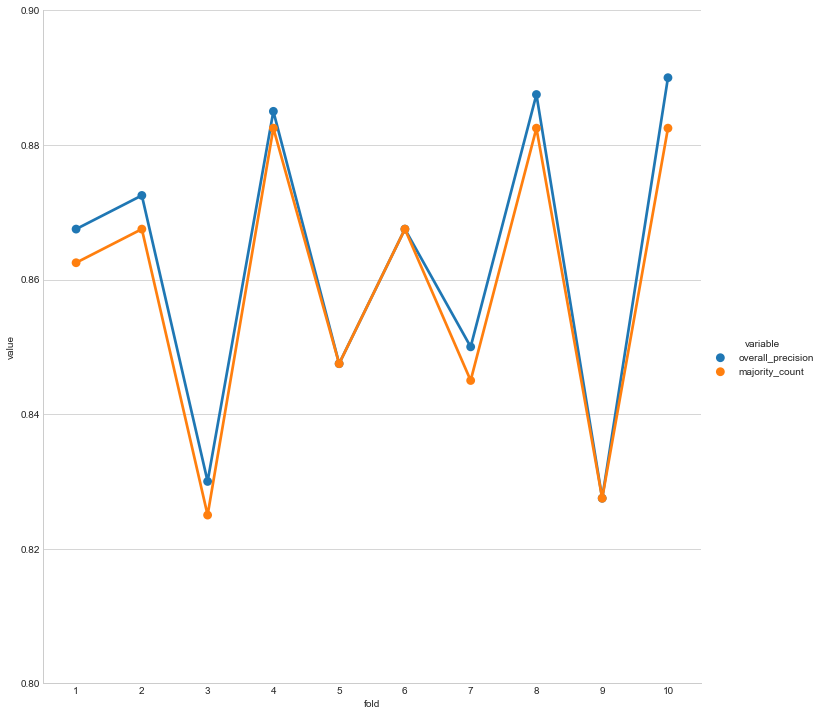

## K Means

In [13]:
def make_df_from_cluster_list(clusters):
    
    frames = []
    cols = ['heatmister_id', 'distance', 'speed', 'location', 'osha']

    for i, cluster in enumerate(clusters):
        df = pd.DataFrame(cluster, columns=cols)
        df['cluster'] = i
        frames.append(df)

    df = pd.concat(frames, ignore_index=True)
    df['distance'] = df['distance'].astype('float')
    df['speed'] = df['speed'].astype(int)
    
    return df

In [14]:
from osha import main

In [15]:
cp = main();


FOLD 1
______________________________________________________
Precision (safe): 0.8693467336683417
Recall (safe): 1.0
F1 (safe): 0.9301075268817204
-----------------------
Precision (compliant): 1.0
Recall (compliant): 0.0
F1 (compliant): 0.0
-----------------------
Precision (noncompliant): 1.0
Recall (noncompliant): 0.1111111111111111
F1 (noncompliant): 0.19999999999999998
-----------------------
Precision (average): 0.9564489112227806
Recall (average): 0.3703703703703704
F1 (average): 0.3767025089605735
-----------------------
Precision (overall): 0.87
Majority count: 0.865
______________________________________________________

FOLD 2
______________________________________________________
Precision (safe): 0.845
Recall (safe): 1.0
F1 (safe): 0.9159891598915989
-----------------------
Precision (compliant): 1.0
Recall (compliant): 0.0
F1 (compliant): 0.0
-----------------------
Precision (noncompliant): 1.0
Recall (noncompliant): 0.0
F1 (noncompliant): 0.0
-----------------------
P

In [16]:
c_plotter = cp

In [30]:
dfs = []
for i, fold_df in enumerate(c_plotter.clusters):
    fold_df['fold'] = i
    dfs.append(fold_df)

In [33]:
data = pd.concat(dfs)

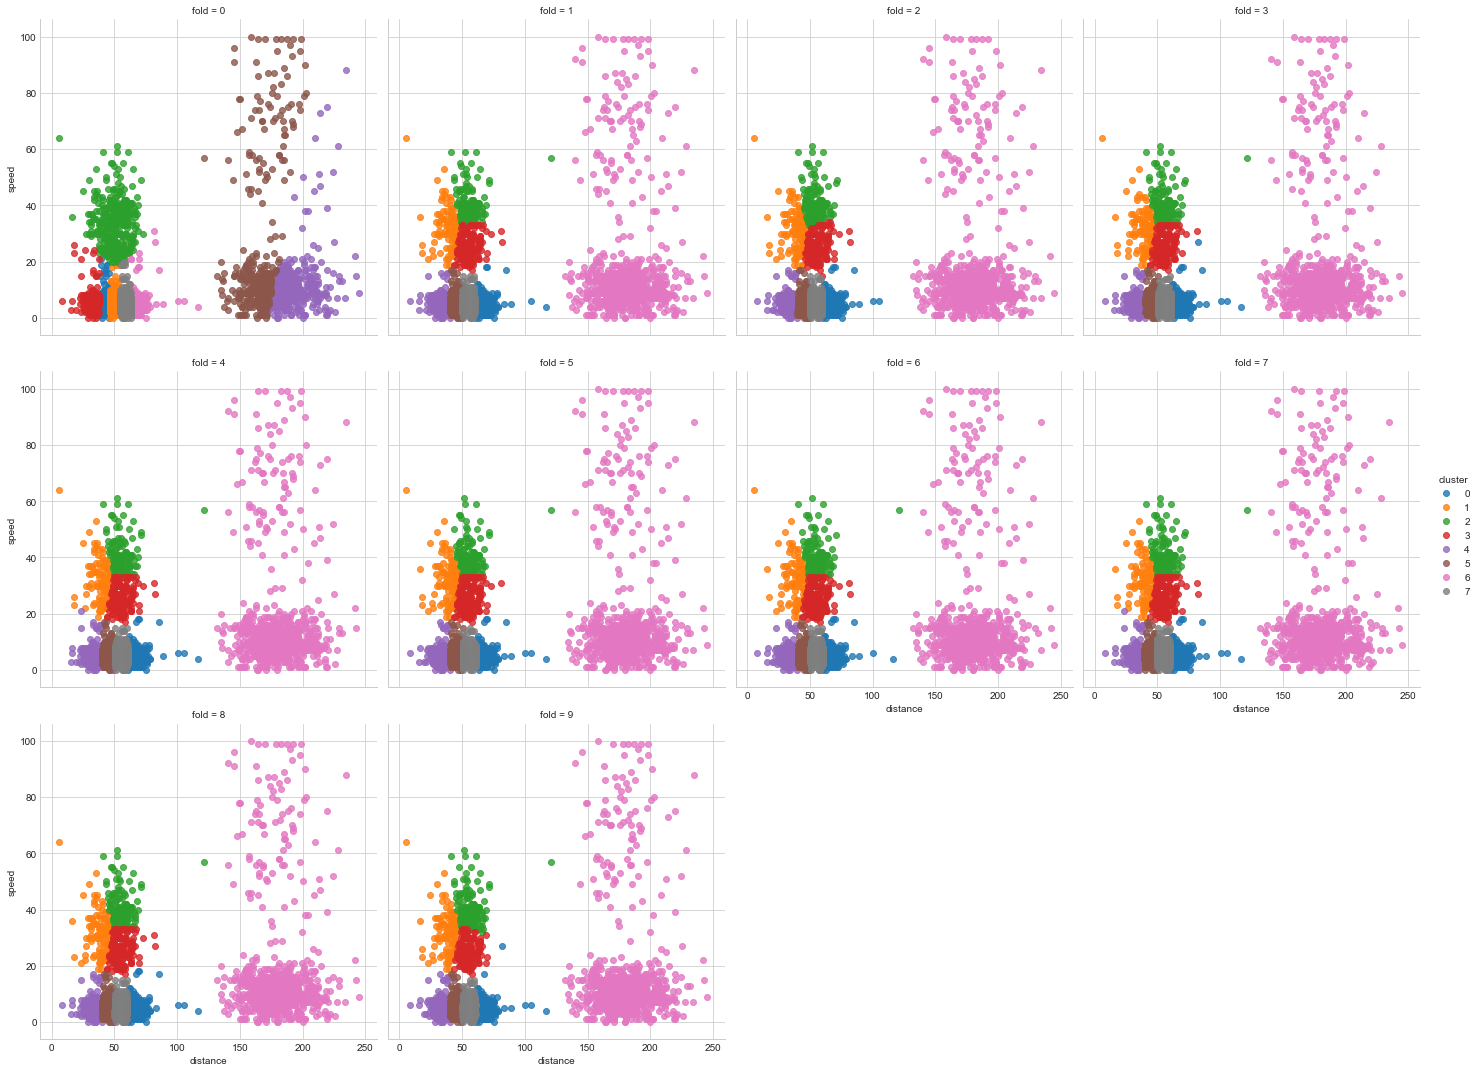

In [36]:
p = sns.lmplot(
    x='distance', y='speed', data=data,
    fit_reg=False, hue='cluster', col='fold', col_wrap=4)

In [38]:
p

In [60]:
frames = []
cols = ['heatmister_id', 'distance', 'speed', 'location', 'osha']

for i, cluster in enumerate(clusters):
    df = pd.DataFrame(cluster, columns=cols)
    df['cluster'] = i
    frames.append(df)

df = pd.concat(frames, ignore_index=True)
df['distance'] = df['distance'].astype('float')
df['speed'] = df['speed'].astype(int)

In [20]:
# pd.read_json('cluster.json')

In [21]:
df.head()

,heatmister_id,distance,speed,location,osha,cluster
0,2018_3416,36.88,5,Office,Safe,0
1,2018_3578,33.32,8,Office,Safe,0
2,2018_569,38.96,4,Office,Safe,0
3,2018_2507,39.31,3,Office,Safe,0
4,2018_2437,36.80,4,Office,Safe,0


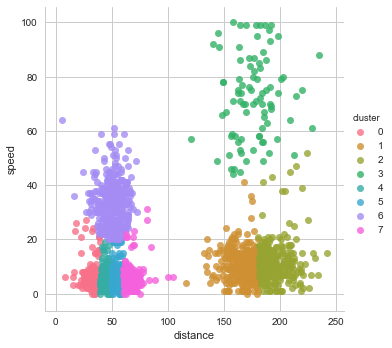

In [59]:
sns.lmplot(
    x='distance', y='speed', data=df,
    fit_reg=False, hue='cluster')

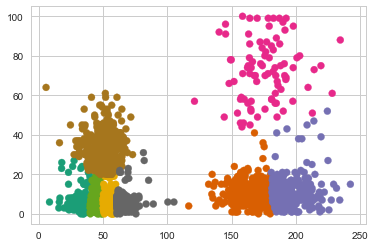

In [45]:
p = 

In [46]:
p.get

In [19]:
d = df[['distance', 'speed', 'cluster']]

In [20]:
len(d)

3430

In [21]:
d.head()

,distance,speed,cluster
0,36.88,5,0
1,33.32,8,0
2,38.96,4,0
3,39.31,3,0
4,36.80,4,0


In [ ]:
sns.FacetGrid(d, 'distance', 'speed')

In [ ]:
df

In [ ]:
g = sns.jointplot(
    "distance", "speed", data=df,
    kind="kde", space=0, color="g")

In [57]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

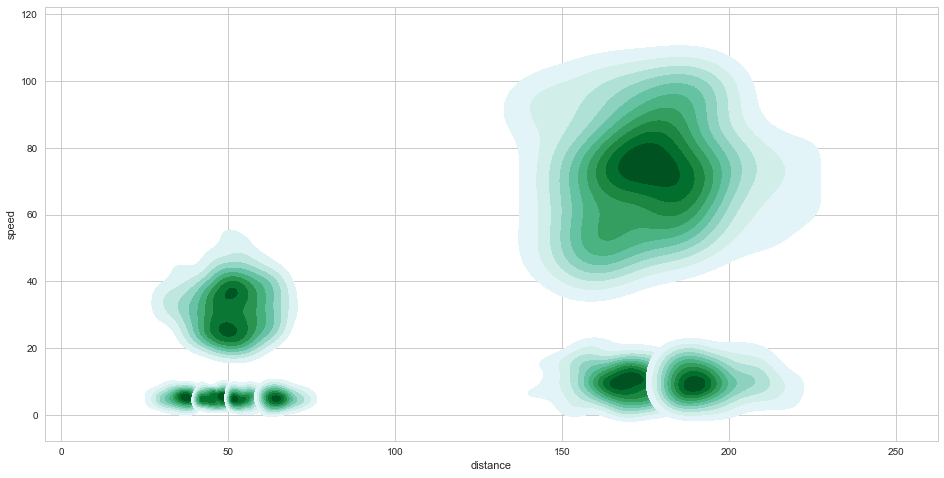

In [52]:
# Set up the figure
f, ax = plt.subplots(figsize=(16, 16))
ax.set_aspect("equal")

num_clusters = len(df.cluster.unique())
pal = sns.cubehelix_palette(n_colors=num_clusters)

for i in range(num_clusters):
    df_i = df[df['cluster']==i]
    ax = sns.kdeplot(
        df_i.distance, df_i.speed,
        shade=True, shade_lowest=False)
    
# ax.legend()